<a href="https://colab.research.google.com/github/Biboswan/TrainingNN_PytorchIntro/blob/master/Fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# http://pytorch.org/
from os.path import exists
from wheel.pep425tags import get_abbr_impl, get_impl_ver, get_abi_tag
platform = '{}{}-{}'.format(get_abbr_impl(), get_impl_ver(), get_abi_tag())
cuda_output = !ldconfig -p|grep cudart.so|sed -e 's/.*\.\([0-9]*\)\.\([0-9]*\)$/cu\1\2/'
accelerator = cuda_output[0] if exists('/dev/nvidia0') else 'cpu'

!pip install -q http://download.pytorch.org/whl/{accelerator}/torch-0.4.1-{platform}-linux_x86_64.whl torchvision
import torch

In [0]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import numpy as np
import matplotlib.pyplot as plt



In [3]:
torch.manual_seed(7)

In [4]:
from torchvision import datasets,transforms

transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,0.5,0.5), (0.5,0.5,0.5)),])

trainset = datasets.FashionMNIST('FashionMNSIT_data/',download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)


Processing...
Done!


In [0]:
images, labels = next(iter(trainloader))


In [9]:
print(images.shape)
print(labels.shape)
print(images[0])

torch.Size([64, 1, 28, 28])
torch.Size([64])
tensor([[[-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -0.0353,  0.2549, -0.0510, -0.0353,
           0.0039, -0.1216,  0.5216,  0.7333, -1.0000, -1.0000, -1.0000,
          -1.0000, -0.9922, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000],
         [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -0.7490,  0.1843,  0.5765,  0.2549,  0.3961,  0.1451,
          -0.0510,  0.0745,  0.5059,  0.4510, -0.1216, -0.9373, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000],
         [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -0.7412,  0.0039,
           0.2706,  0.4902,  0.4510,  0.3255,  0.3490,  0.0745, -0.3725,
          -0.6549, -0.0667,  0.0902,  0.2157,  0.5059,  0.4510,  0.3490,
          -0.1765, -0.8902, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000],
         [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -0.3882,  0.4902,
   

tensor(-1.)


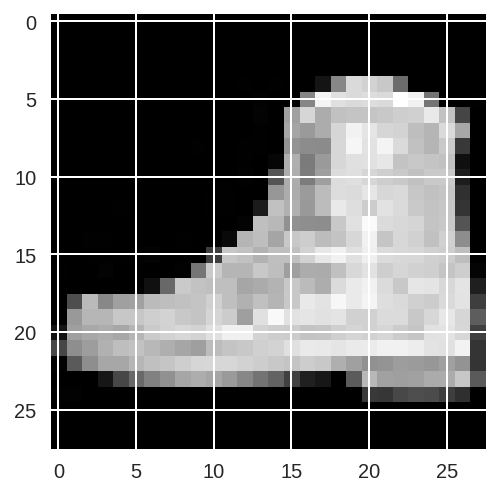

In [10]:
plt.imshow(images[4].numpy().squeeze(), cmap='Greys_r')
print(images[2][0][27][27])

In [14]:
from torch import optim
from torch import nn
model = nn.Sequential(nn.Linear(784,128),
                     nn.ReLU(),
                     nn.Linear(128,64),
                     nn.ReLU(),
                     nn.Linear(64,10)
                     )
optimizer = optim.SGD(model.parameters(), lr=0.003)
#This criterion combines nn.LogSoftmax() and nn.NLLLoss() in one single class.
criterion = nn.CrossEntropyLoss()
print('lenght of trainloader',len(trainloader))
epochs = 18
for e in range(epochs):
  running_loss = 0
  for images, labels in trainloader:
    images = images.view(images.shape[0], -1)
    optimizer.zero_grad()
  # Clear the gradients or else gradients are accumulated from previous training pass
    output = model.forward(images)
    loss = criterion(output,labels)
    running_loss+=loss.item()
    loss.backward()
    optimizer.step()

  else:
    print('Training Loss:', running_loss/len(trainloader))  
    
    


lenght of trainloader 938
Training Loss: 1.6717975596502137
Training Loss: 0.8521587360642358
Training Loss: 0.6772314196647103
Training Loss: 0.6087346089356489
Training Loss: 0.5667096836162783
Training Loss: 0.5369510973758026
Training Loss: 0.5147913447829452
Training Loss: 0.4971562677354955
Training Loss: 0.48316800578443736
Training Loss: 0.47123430982263864
Training Loss: 0.46149442880265495
Training Loss: 0.45270516008519923
Training Loss: 0.44418970759171666
Training Loss: 0.43710646061882025
Training Loss: 0.43069962111871635
Training Loss: 0.42466939375725893
Training Loss: 0.41923009801203254
Training Loss: 0.414069784459656


In [0]:
import matplotlib.pyplot as plt
import numpy as np
from torch import nn, optim
from torch.autograd import Variable


def test_network(net, trainloader):

    criterion = nn.MSELoss()
    optimizer = optim.Adam(net.parameters(), lr=0.001)

    dataiter = iter(trainloader)
    images, labels = dataiter.next()

    # Create Variables for the inputs and targets
    inputs = Variable(images)
    targets = Variable(images)

    # Clear the gradients from all Variables
    optimizer.zero_grad()

    # Forward pass, then backward pass, then update weights
    output = net.forward(inputs)
    loss = criterion(output, targets)
    loss.backward()
    optimizer.step()

    return True


def imshow(image, ax=None, title=None, normalize=True):
    """Imshow for Tensor."""
    if ax is None:
        fig, ax = plt.subplots()
    image = image.numpy().transpose((1, 2, 0))

    if normalize:
        mean = np.array([0.485, 0.456, 0.406])
        std = np.array([0.229, 0.224, 0.225])
        image = std * image + mean
        image = np.clip(image, 0, 1)

    ax.imshow(image)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.tick_params(axis='both', length=0)
    ax.set_xticklabels('')
    ax.set_yticklabels('')

    return ax


def view_recon(img, recon):
    ''' Function for displaying an image (as a PyTorch Tensor) and its
        reconstruction also a PyTorch Tensor
    '''

    fig, axes = plt.subplots(ncols=2, sharex=True, sharey=True)
    axes[0].imshow(img.numpy().squeeze())
    axes[1].imshow(recon.data.numpy().squeeze())
    for ax in axes:
        ax.axis('off')
        ax.set_adjustable('box-forced')

def view_classify(img, ps, version="MNIST"):
    ''' Function for viewing an image and it's predicted classes.
    '''
    ps = ps.data.numpy().squeeze()

    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
    ax1.imshow(img.resize_(1, 28, 28).numpy().squeeze())
    ax1.axis('off')
    ax2.barh(np.arange(10), ps)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    if version == "MNIST":
        ax2.set_yticklabels(np.arange(10))
    elif version == "Fashion":
        ax2.set_yticklabels(['T-shirt/top',
                            'Trouser',
                            'Pullover',
                            'Dress',
                            'Coat',
                            'Sandal',
                            'Shirt',
                            'Sneaker',
                            'Bag',
                            'Ankle Boot'], size='small');
    ax2.set_title('Class Probability')
    ax2.set_xlim(0, 1.1)

    plt.tight_layout()

Labels for reference: https://github.com/zalandoresearch/fashion-mnist#labels

tensor([[0.0000, 0.0000, 0.0001, 0.0001, 0.0000, 0.0522, 0.0000, 0.8937, 0.0065,
         0.0473]])


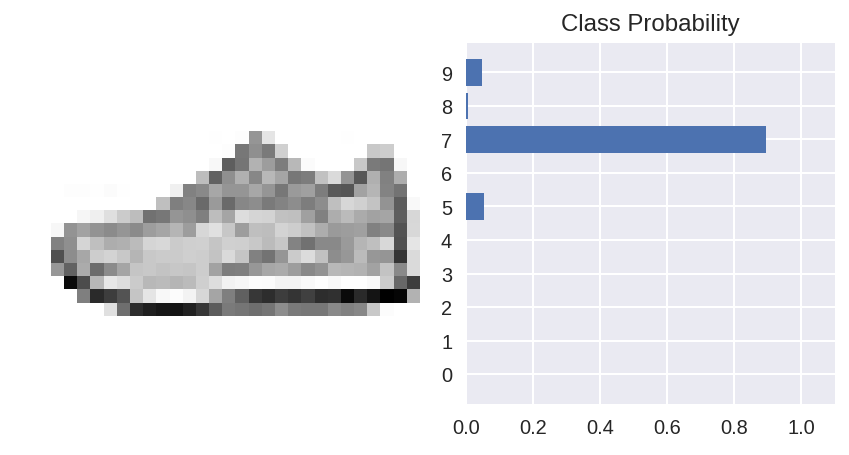

In [18]:
%matplotlib inline
import torch.nn.functional as F
images, labels = next(iter(trainloader))
img = images[25].view(1, 784)

#Turn off gradient to speed up this prediction checking part
with torch.no_grad():
  logits = model.forward(img)
  
ps = F.softmax(logits, dim=1)
print(ps)
#plt.imshow(images[0].numpy().squeeze(), cmap='Greys_r')
view_classify(img.view(1,28,28), ps)  